In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "C:/Users/ArbiaBejaoui/Udemy ML Kurs/13 - Case Study/3 - Case Study Income/1 - Lösung/Startupstest2014.xlsx"
df = pd.read_excel(path)

In [3]:
from sklearn.preprocessing import scale
num_cols = ['funding_total_usd', 'funding_rounds', 'founded_year', 'Company age']
df_scaled = scale(df[num_cols])
df_scaled = pd.DataFrame(df_scaled, columns = num_cols)
print(df_scaled.describe().round(5))

       funding_total_usd  funding_rounds  founded_year  Company age
count          515.00000       515.00000     515.00000    515.00000
mean             0.00000         0.00000       0.00000     -0.00000
std              1.00097         1.00097       1.00097      1.00097
min             -1.00478        -0.45529      -1.31837     -2.18143
25%             -0.81856        -0.45529      -0.44342     -0.43153
50%             -0.39100        -0.45529      -0.44342      0.44342
75%              0.61610        -0.45529       0.43153      0.44342
max              2.72533         6.48181       2.18143      1.31837


In [4]:
df['status'].unique()

array(['operating', 'closed', 'acquired'], dtype=object)

In [5]:
df['status']=np.where(df['status'] =='acquired', 'sucessful', df['status'])
df['status']=np.where(df['status'] =='operating', 'sucessful', df['status'])
df['status']=np.where(df['status'] =='closed', 'failure', df['status'])

In [6]:
df['status'].unique()

array(['sucessful', 'failure'], dtype=object)

In [7]:
#Data encoding 
from sklearn.preprocessing import LabelEncoder
df['status_encoded'] = LabelEncoder().fit_transform(df['status'])
df[['status', 'status_encoded']] # special syntax to get just these two columns

,status,status_encoded
0,sucessful,1
1,sucessful,1
2,sucessful,1
3,failure,0
4,sucessful,1
...,...,...
510,sucessful,1
511,sucessful,1
512,sucessful,1
513,sucessful,1


In [8]:
encoder = LabelEncoder()
encoder.fit(df['status'])
encoder.classes_

array(['failure', 'sucessful'], dtype=object)

In [9]:
#Binary encoding
df['status_encoded'] = df['status'].map( {'failure':0, 'sucessful':1})
df[['status', 'status_encoded']]

,status,status_encoded
0,sucessful,1
1,sucessful,1
2,sucessful,1
3,failure,0
4,sucessful,1
...,...,...
510,sucessful,1
511,sucessful,1
512,sucessful,1
513,sucessful,1


In [10]:
df_counts = df[['name', 'status_encoded']].groupby('status_encoded').count()
print(df_counts)

                name
status_encoded      
0                 22
1                493


matplotlib.axes._subplots.AxesSubplot

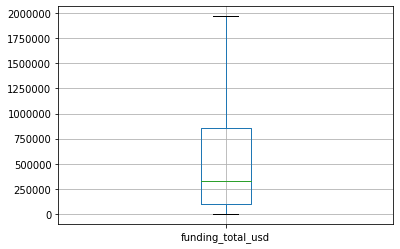

In [11]:
boxplot = df.boxplot(column=['funding_total_usd'], return_type='axes')

type(boxplot)

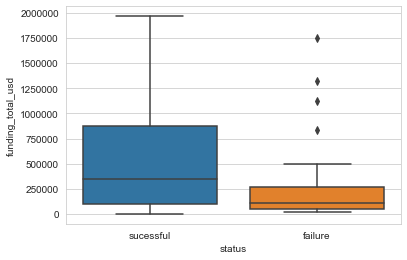

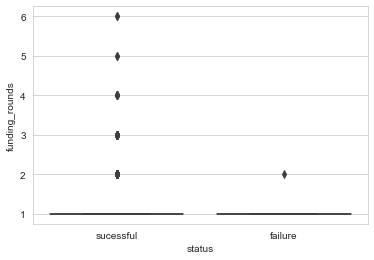

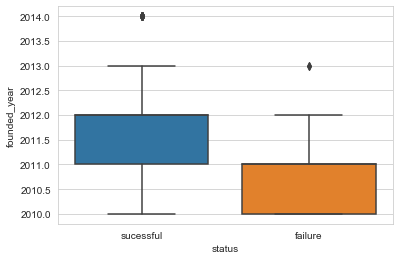

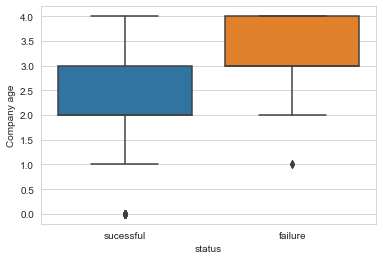

In [12]:
def plot_box(df, cols, col_x = 'status'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=df)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = ['funding_total_usd', 'funding_rounds', 'founded_year', 'Company age']
plot_box(df, num_cols)

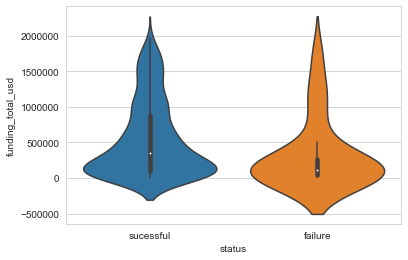

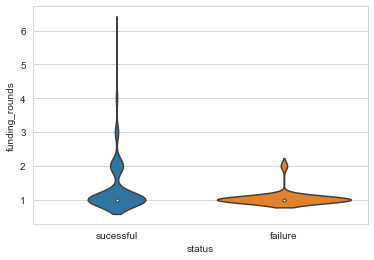

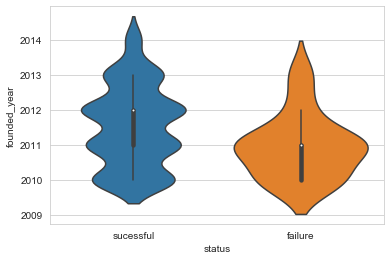

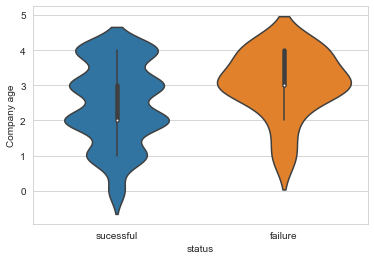

In [13]:
def plot_violin(df, cols, col_x = 'status'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, data=df)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

plot_violin(df, num_cols)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
sk_totalfunding=scaler.fit_transform((df['funding_total_usd'].values.reshape(-1,1)))
df['fundingtotal_sca']=sk_totalfunding
df[['funding_total_usd','fundingtotal_sca']].describe().round(3)

,funding_total_usd,fundingtotal_sca
count,515.000,515.000
mean,530772.726,0.000
std,526769.878,1.001
min,2000.000,-1.005
25%,100000.000,-0.819
50%,325006.000,-0.391
75%,855000.000,0.616
max,1965000.000,2.725


matplotlib.axes._subplots.AxesSubplot

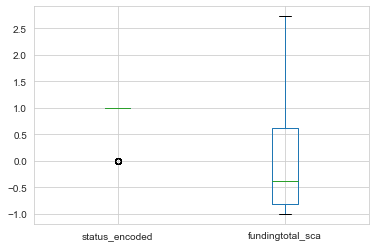

In [15]:
boxplot = df.boxplot(column=['status_encoded', 'fundingtotal_sca'], return_type='axes')

type(boxplot)
#<class 'matplotlib.axes._subplots.AxesSubplot'>

In [16]:
#data = df.as_matrix()
data = df[["country_code","funding_total_usd","funding_rounds","founded_year","Company age","status_encoded"]].values
x = data[:,:-1]
y=data[:,-1]
y=np.array([0 if val=="closed" else 1 for val in y],dtype=np.int8)
print(x.shape, y.shape)
print(y)
print(x[0])

(515, 5) (515,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [18]:
enc= OneHotEncoder(handle_unknown="ignore")
enc.fit(x[:,:-2])
x_cat= enc.transform(x[:,:-2]).toarray()
x_cat= np.append(x_cat,x[:,-2:],axis=1)
print(x_cat.shape)
print(x_cat[0])


(515, 286)
[0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x_cat,y,test_size=0.3)

print (x_train.shape,x_test.shape)
print(x_train[0])

(360, 286) (155, 286)
[0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x_cat,y,test_size=0.3)

scaler= StandardScaler()
scaler.fit(x_train)
x_train= scaler.transform(x_train)
x_test= scaler.transform(x_test)


In [21]:
parameters={"n_estimators":[50,100,200],"max_depth":[None,30,50,100]}
clf= RandomForestClassifier()
clf= GridSearchCV(clf,parameters, cv=3,n_jobs=-1)# 3 folds for Cross validation
clf.fit(x_train,y_train) 

print("Best parameters set found on developement set:")
print (clf.best_params_, "\n")

means=clf.cv_results_['mean_test_score']
stds= clf.cv_results_['std_test_score']

for mean,std,params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f(+/-%0.03f) for %r"% (mean,std*2,params))

print("Best params")
print(clf.best_params_)
print(clf.best_score_)

Best parameters set found on developement set:
{'max_depth': None, 'n_estimators': 50} 

1.000(+/-0.000) for {'max_depth': None, 'n_estimators': 50}
1.000(+/-0.000) for {'max_depth': None, 'n_estimators': 100}
1.000(+/-0.000) for {'max_depth': None, 'n_estimators': 200}
1.000(+/-0.000) for {'max_depth': 30, 'n_estimators': 50}
1.000(+/-0.000) for {'max_depth': 30, 'n_estimators': 100}
1.000(+/-0.000) for {'max_depth': 30, 'n_estimators': 200}
1.000(+/-0.000) for {'max_depth': 50, 'n_estimators': 50}
1.000(+/-0.000) for {'max_depth': 50, 'n_estimators': 100}
1.000(+/-0.000) for {'max_depth': 50, 'n_estimators': 200}
1.000(+/-0.000) for {'max_depth': 100, 'n_estimators': 50}
1.000(+/-0.000) for {'max_depth': 100, 'n_estimators': 100}
1.000(+/-0.000) for {'max_depth': 100, 'n_estimators': 200}
Best params
{'max_depth': None, 'n_estimators': 50}
1.0


In [22]:
print (np.unique (y_test))

[1]


In [23]:
parameters={"kernel":["sigmoid","poly","rbf"]}
clf= SVC()
clf= GridSearchCV(clf,parameters, cv=3)
clf.fit(x_train,y_train)

print("Best parameters set found on developement set")
print (clf.best_params_, "\n")

means=clf.cv_results_['mean_test_score']
stds= clf.cv_results_['std_test_score']

for mean,std,params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f(+/-%0.03f) for %r"% (mean,std*2,params))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selecti

ValueError: The number of classes has to be greater than one; got 1 class

In [ ]:
from keras.layers import*
from keras.models import*
from keras.optimizers import*